<font size="+3.7" color="green"><b><center>House Pricing Predictions Guide</center></b></font><br>





# Introduction
Hi,
I created a notebook as a guide for this Advanced House Pricing Competition. This competition is relatively similar to its predecessor except for a different output and slightly different procedure. I have a notebook for the regular House Pricing Competition if you want to check it out. This notebook will continuously be updated as I still have a lot to learn from this competition and in general. 

This kernel was very helpful to me:
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

If you have any questions or comments please leave them in the comment section! Also if you found this helpful please leave an UPVOTE, thank you!

<font size="+3" color="green"><b>Useful Pandas CheatSheet</b></font><br>
### -> https://www.kaggle.com/getting-started/146910

<div class="list-group" id="list-tab" role="tablist">
  <h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents:</h1>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile">1. Importing Libraries<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages">2. Reading and Inspecting Data<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#3" role="tab" aria-controls="settings">3. SalePrice: Skew and Kurtosis Analysis<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings">4. Outliers<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings">5. Missing Values<span class="badge badge-primary badge-pill">5</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings">6. Feature Engineering<span class="badge badge-primary badge-pill">6</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings">7. High Skew Features<span class="badge badge-primary badge-pill">7</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#8" role="tab" aria-controls="settings">8. Modelling<span class="badge badge-primary badge-pill">8</span></a>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#9" role="tab" aria-controls="settings">9. Submission<span class="badge badge-primary badge-pill">9</span></a>  
</div>

# Version Logs:
* Version 1: RELEASED

* Version 2:
    * ['TotalSF'] feature now includes '1stFlrSF' in Feature Engineering section
    * Dataframe with Percentage of Missing values is multiplied by 100
    * Removed accidently created duplicate of 'HasBsmt'
* Version 3 **[CURRENT]**:
    * Dropped pre-used outliers from other notebooks
    * Added more visualization for outliers

<a id="1"></a> <br>
<font size="+3" color="green"><b>1 - Importing Libraries</b></font><br><a id="1"></a>
<br>
Importing Necessary Libraries 

In [1]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV
from sklearn import metrics 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ModuleNotFoundError: No module named 'xgboost'

<font size="+3" color="green"><b>2 - Reading and Inspecting Data</b></font><br><a id="2"></a>
### Section Contents: 

- 2.1.  Reading Data

- 2.2.  Inspecting Data


### 2.1 Reading Data
Reading in train and test data

In [5]:
home = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

### 2.2 Inspecting Data
Checking our Data, Saving then dropping Id column, Checking Dataset's Dimensions

In [6]:
home.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
# Save Id for submission
test_Id = test['Id']

home.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)



KeyError: 'Id'

In [10]:
print("Home Data Dimensions: {}".format(home.shape))
print("Test Data Dimensions: {}".format(test.shape))

Home Data Dimensions: (1460, 80)
Test Data Dimensions: (1459, 79)


<font size="+3" color="green"><b>3 - SalePrice: Skew and Kurtosis Analysis</b></font><br><a id="3"></a>
### Section Contents:
- 3.1 Original SalePrice Visualization
- 3.2 Log-Transforming SalePrice
- 3.3 Log-Transformed SalePrice Visualization

### Additional Information about Statistics:
### - https://www.kaggle.com/getting-started/149618

### Skew Formula:
![](https://i0.wp.com/datalabbd.com/wp-content/uploads/2019/05/3b.png?w=520&ssl=1)

### Kurtosis Formula:
![](https://rula-tech.com/uploads/images/Kurtosis/kurtosis_formula.png)

### 3.1 Original SalePrice Visualization
Print out skew and Kurtosis of SalePrice, Visualize SalePrice with distplot and probplot

Skewness: 1.882876
Kurtosis: 6.536282


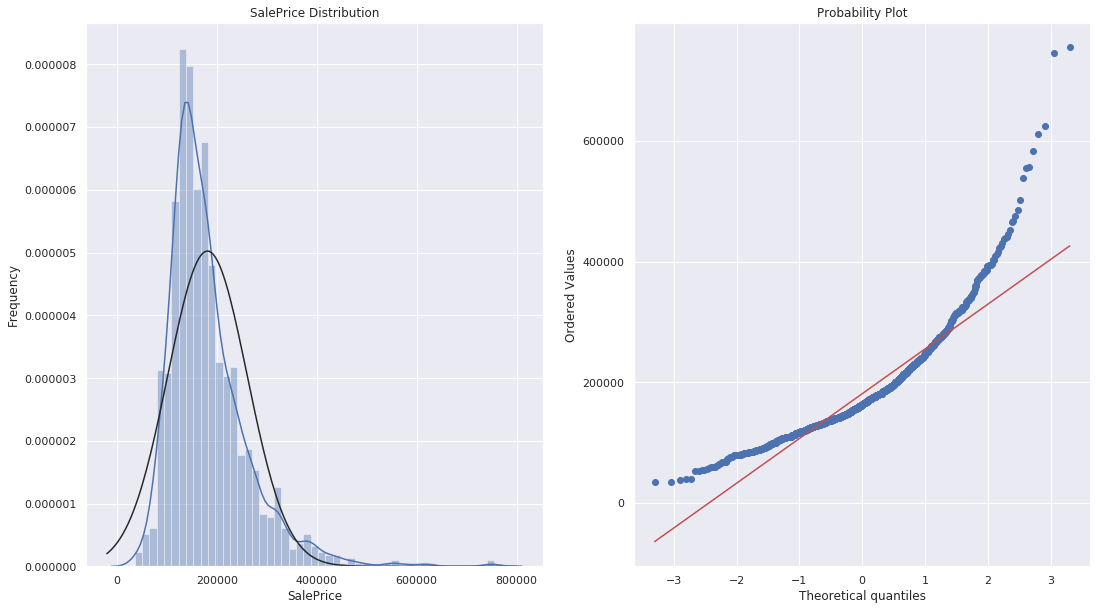

In [11]:
print("Skewness: %f" % home['SalePrice'].skew())
print("Kurtosis: %f" % home['SalePrice'].kurt())

figure = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.distplot(home['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(home['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

plt.subplot(1,2,2)
stats.probplot(home['SalePrice'], plot=plt)
plt.show()

![](https://miro.medium.com/max/1110/1*mshlbZAnP4uZubMNSuWWOA.jpeg)

### Reasons a right-skewed predictive variable is bad:
- Mean greater than mode
- Median greater than mode
- Mean is greater than median

### This eventually can affect the performance of our modelling process, so we will decide to log-transform it in the next step.

### 3.2 Log-Transforming SalePrice
Log-Transforming SalePrice with np.log1p

![](https://i.stack.imgur.com/giq8G.png)

### Random Example:
This shows the distribution of a dataset before and after log-transformation

![](https://miro.medium.com/max/810/1*4fagRPrzuHquTAKe35OhdA.png)

In [13]:
home['SalePrice'] = np.log1p(home['SalePrice'])

### 3.3 Log-Transformed SalePrice Visualization
Print out skew and Kurtosis after log-transformation, Visualize SalePrice after Log-transformation

![](https://cdn-images-1.medium.com/max/800/1*hxVvqttoCSkUT2_R1zA0Tg.gif)

Skewness: -0.009229
Kurtosis: 0.887029


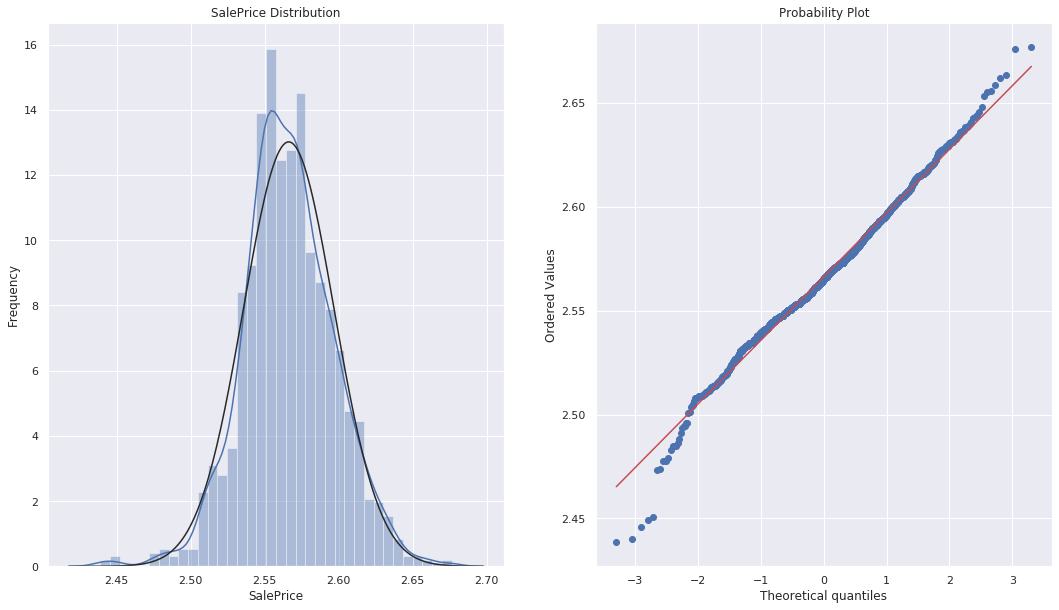

In [14]:
# Print out Skewness and Kurtosis
print("Skewness: %f" % home['SalePrice'].skew())
print("Kurtosis: %f" % home['SalePrice'].kurt())

figure = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.distplot(home['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(home['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

plt.subplot(1,2,2)
stats.probplot(home['SalePrice'], plot=plt)
plt.show()

<font size="+3" color="green"><b>4 - Outliers</b></font><br><a id="4"></a>

### Section Contents:
- 4.1 Univariate Analysis
- 4.2 Bivariate Analysis
- 4.3 Removing Outliers

### Additional Information about Outliers: 
### - https://www.kaggle.com/getting-started/147428

### - https://www.kaggle.com/getting-started/150064

### 4.1 Univariate Analysis
In the name 'Univariate Analysis' 'Uni' means one, and 'variate' means variable, meaning that Univariate analysis is analysis of one feature. This procedure basically tells us the distribution of each feature and information about its mean, median, and mode. This is our first step to detecting outliers.

In [17]:
numerical_features = home.select_dtypes(exclude='object').drop(['SalePrice'], axis=1)

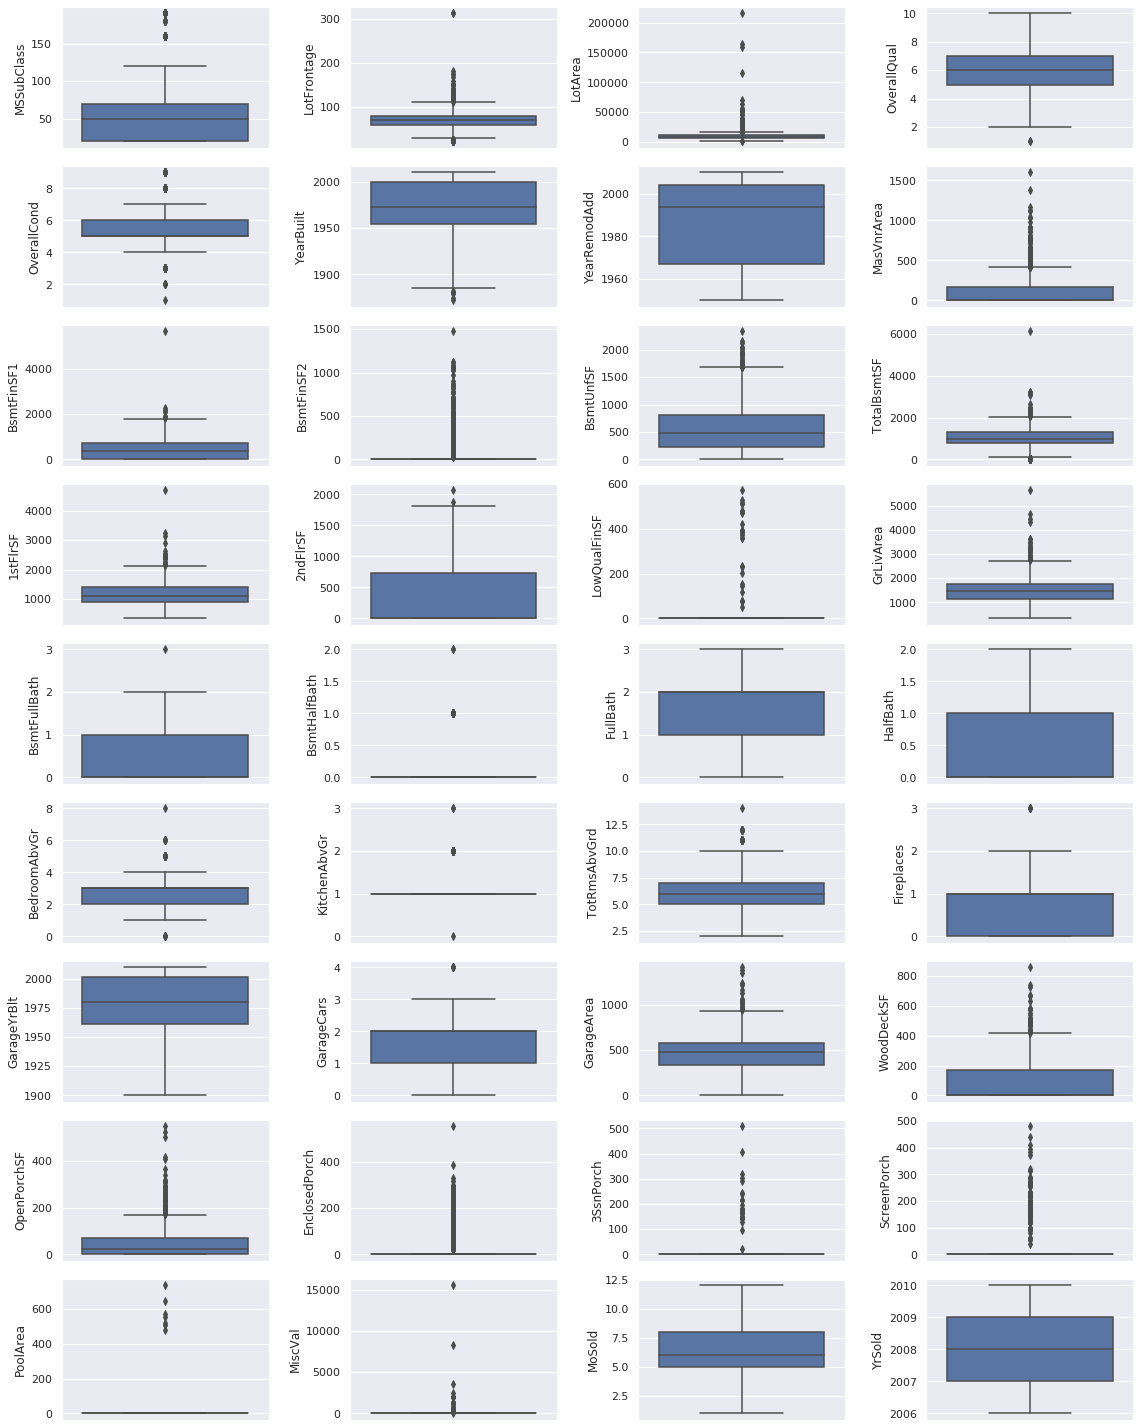

In [18]:
fig = plt.figure(figsize=(16,20))

for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

### 4.2 Bivariate Analysis
Bivariate Analysis is a procedure but with two variables (hence the name 'Bi'), not one. This is our second step to detecting outliers.

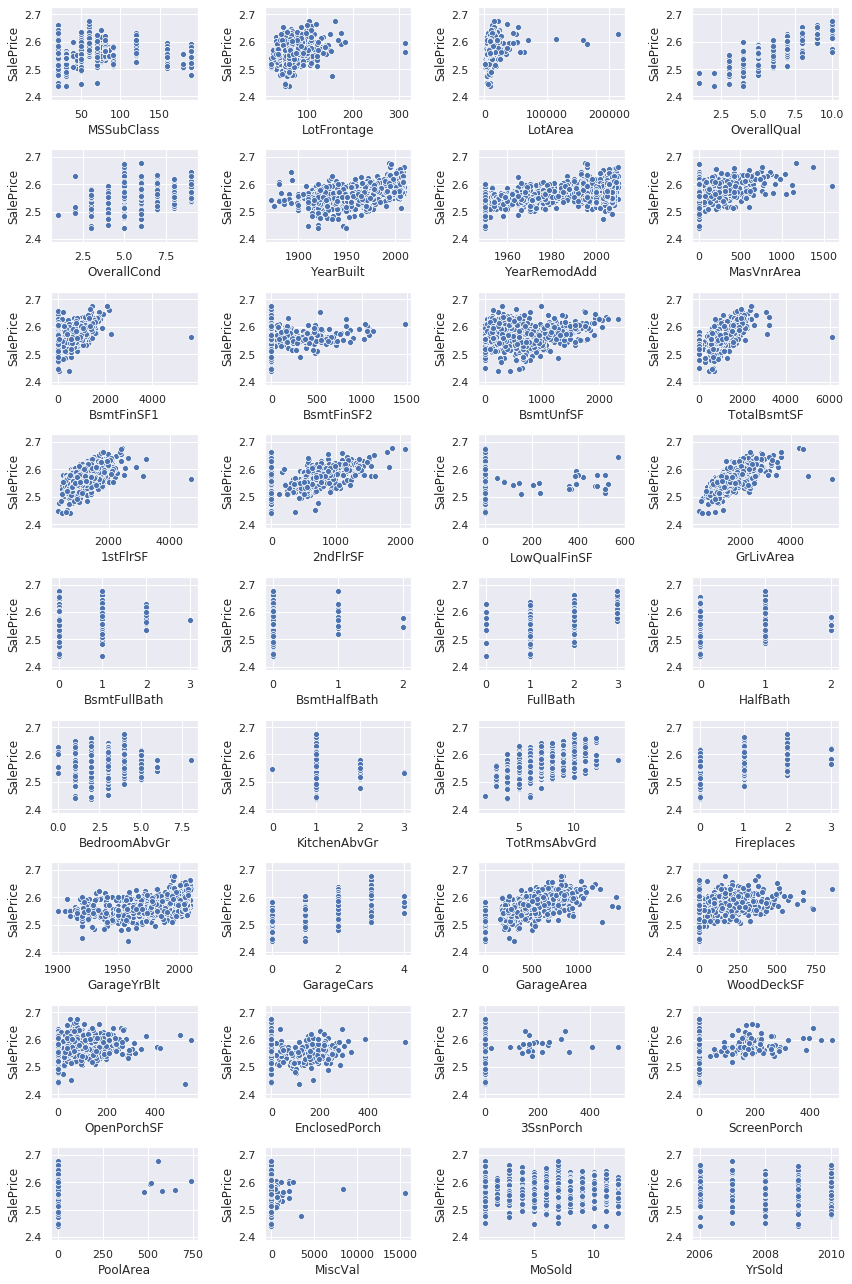

In [19]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(numerical_features.iloc[:, i],home['SalePrice'])
plt.tight_layout()
plt.show()

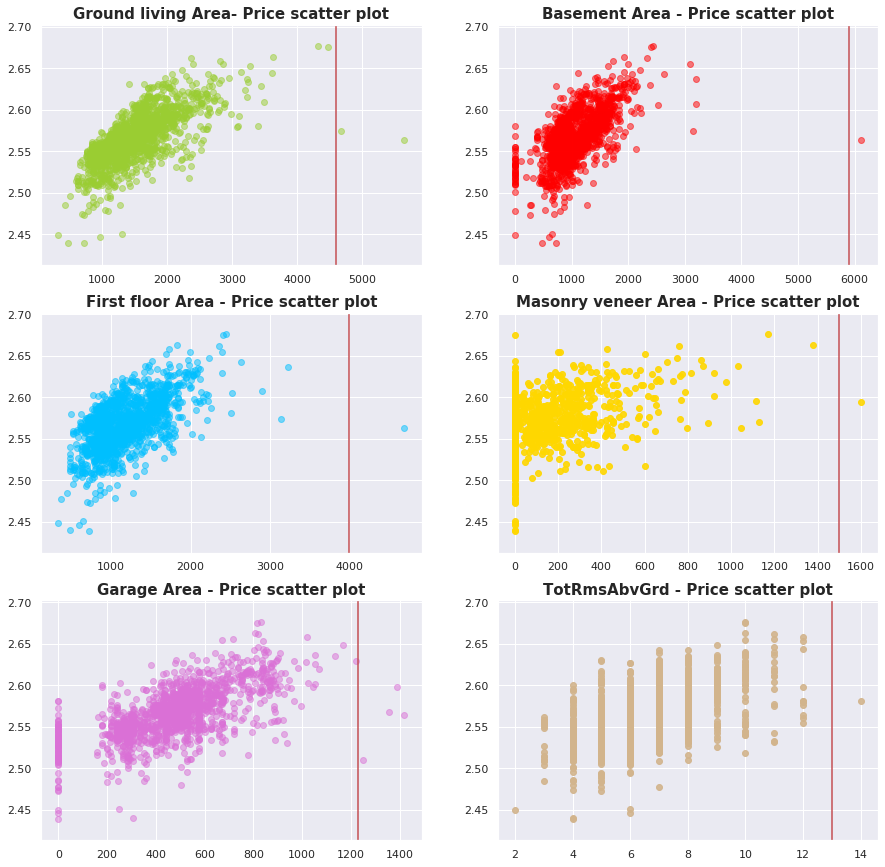

In [20]:
# Credit to https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=home['GrLivArea'], y=home['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=home['TotalBsmtSF'], y=home['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=home['1stFlrSF'], y=home['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=home['MasVnrArea'], y=home['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=home['GarageArea'], y=home['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=home['TotRmsAbvGrd'], y=home['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )
plt.show()

### 4.3 Removing Outliers
After looking at the Visualizations of each numerical feature, we use the 1.5 IQR Rule in order to detect and remove outliers 

### Using the 1.5 IQR Rule: 
![](https://cdn.kastatic.org/googleusercontent/8bSRVB7q_zWxFliXcZVQSBDtip3sMGRkkHGLVzvflS3goQZZhmhrSD9u1cSduXh-9DJ9sSjCqVyozwQ_FwJNkptC)

### It states that a data point is an outlier if:
- It is below the First Quadrant (Q1) subtracted by (1.5 x IQR)
- It is above the Third Quadrant (Q3) added by (1.5 x IQR)

In [23]:
# Gathered these positions and outliers from previous notebooks

pos = [1298,523, 297]
home.drop(home.index[pos], inplace=True)

In [24]:
home.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2.583824
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2.573300
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2.589054
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2.553297
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,2.597433


- We can see that our dataset shrunk because some of the rows with outliers were removed

In [25]:
home.shape

(1451, 80)

<font size="+3" color="green"><b>5 - Missing Values</b></font><br><a id="5"></a>

### Section Contents:
- 5.1 Checking for Missing Values
- 5.2 Imputing Certain features with 'None'
- 5.3 Imputing Certain features with their Mode
- 5.4 Imputing Garage-related features
- 5.5 Imputing Basement-related features
- 5.6 Imputing MasVnr-Related Features
- 5.7 Imputing LotFrontage
- 5.8 Checking for any Extra Missing Values

### 5.1 Checking for Missing Values
Combining train and test data in order to make imputing missing values easier, locating missing values

In [27]:
# Save target value for later
y = home.SalePrice.values

# In order to make imputing easier, we combine train and test data
home.drop(['SalePrice'], axis=1, inplace=True)
dataset = pd.concat((home, test)).reset_index(drop=True)

AttributeError: 'DataFrame' object has no attribute 'SalePrice'

In [ ]:
dataset.head()

In [ ]:
dataset.shape

- Creating a Dataframe listing every feature with missing values

In [ ]:
na_percent = (dataset.isnull().sum()/len(dataset))[(dataset.isnull().sum()/len(dataset))>0].sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Percentage':na_percent*100})
missing_data

- Creating a Visualization of every feature with missing values

In [ ]:
na = (dataset.isnull().sum() / len(dataset)) * 100
na = na.drop(na[na == 0].index).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(15,12))
sns.barplot(x=na.index, y=na)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.title('Percentage Missing', fontsize=15)

- Checking each feature's type to know which value to impute later

In [ ]:
dataset[na.index].dtypes

### 5.2 Imputing Certain features with 'None'
Imputing some features with 'None'

- Any of the below features with a missing value likely indicates that it doesn't exist

Ex: FireplaceQu doesn't exist, therefore it probably means that there was no Fireplace for that house

In [ ]:
for col in ('FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC', 'MSSubClass'):
    dataset[col] = dataset[col].fillna('None')

### 5.3 Imputing Certain features with their Mode
Imputing some features with their mode

- The reason we fill in these features with their mode (most common value) is because these features are mandatory in a house, meaning that if these values are missing it has to be because of the data, not because of the fact that the house is missing the feature.

Ex: For the 'Electrical' feature we fill in the most common value because every house has electricity, therefore it wouldn't make sense for there to be any missing values.

In [ ]:
for col in ('Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'Functional', 'MSZoning', 'SaleType', 'Utilities'):
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

### 5.4 Imputing Garage-related features
Imputing Garage-Related Features which are numerical with 0 and 'None' for categorical

- A Garage-Related Feature with a missing value usually indicates there is no Garage

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    dataset[col] = dataset[col].fillna(0)
    
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    dataset[col] = dataset[col].fillna('None')

### 5.5 Imputing Basement-related features
Imputing Basement-Related Features which are numerical with 0 and 'None' for categorical

- A Basement-Related Feature with a missing value usually indicates there is no Basement

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dataset[col] = dataset[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    dataset[col] = dataset[col].fillna('None')

In [ ]:
dataset.isnull().sum()[dataset.isnull().sum() > 0].sort_values(ascending=False)

### 5.6 Imputing MasVnr-Related Features
Imputing 'MasVnrType' and 'MasVnrArea'

- There are two features related to MasVnr that have missing values: 'MasVnrType' and 'MasVnrArea'. 
- 'MasVnrType' is a categorical feature that we need to impute with 'None'
- 'MasVnrArea' is a categorical feature that we need to impute with 'MasVnrType'

In [ ]:
dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

### 5.7 Imputing LotFrontage
Imputing LotFrontage with median based on 'Neighborhood'

In [ ]:
# LotFrontage is correlated to the 'Neighborhood' feature because the LotFrontage for nearby houses will be really similar, so we fill in missing values by the median based off of Neighborhood
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

### 5.8 Checking for any Extra Missing Values
Checking for any more missing values (Ignore SalePrice because that's our target variable)

In [ ]:
na_percent = (dataset.isnull().sum()/len(dataset))[(dataset.isnull().sum()/len(dataset))>0].sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Percentage':na_percent})
missing_data

<font size="+3" color="green"><b>6 - Feature Engineering</b></font><br><a id="6"></a>

### Section Contents:
- 6.1 Changing Types
- 6.2 Create 'TotalSF' Feature
- 6.3 Create 'TotalBath' Feature
- 6.4 Create 'YrBuiltAndRemod' Feature
- 6.5 Create 'PorchSF' Feature
- 6.6 Creating Extra Features
- 6.7 Label Encoding

In [ ]:
list(dataset.select_dtypes(exclude='object').columns)

### 6.1 Changing Types
Changing the types of some of the features

In [ ]:
# Features 'MSSubClass', 'YrSold', 'OverallCond' and 'MoSold' are supposed to be categorical features so change their type
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)
dataset['YrSold'] = dataset['YrSold'].apply(str)
dataset['MoSold'] = dataset['MoSold'].apply(str)
dataset['OverallCond'] = dataset['OverallCond'].astype(str)

# Features 'LotArea' and 'MasVnrArea' are supposed to be numerical features so change their type
dataset['LotArea'] = dataset['LotArea'].astype(np.int64)
dataset['MasVnrArea'] = dataset['MasVnrArea'].astype(np.int64)

### 6.2 Create 'TotalSF' Feature
Visualize 'TotalBsmtSF' and '2ndFlrSF' and them together, Create 'TotalSF' for total surface area with those features

In [ ]:
figure, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(20,10)
_ = sns.regplot(home['TotalBsmtSF'], y, ax=ax1)
_ = sns.regplot(home['1stFlrSF'], y, ax=ax2)
_ = sns.regplot(home['2ndFlrSF'], y, ax=ax3)
_ = sns.regplot(home['TotalBsmtSF'] + home['2ndFlrSF']+home['1stFlrSF'], y, ax=ax4)

In [ ]:
dataset['TotalSF']=dataset['TotalBsmtSF']  + dataset['1stFlrSF'] + dataset['2ndFlrSF']

### 6.3 Create 'TotalBath' Feature
Visualize 'BsmtFullBath', 'FullBath', 'BsmtHalfBath' and them together, Create 'TotalBath' for total number of bathrooms using those features

In [ ]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,10)
_ = sns.barplot(home['BsmtFullBath'], y, ax=ax1)
_ = sns.barplot(home['FullBath'], y, ax=ax2)
_ = sns.barplot(home['BsmtHalfBath'], y, ax=ax3)
_ = sns.barplot(home['BsmtFullBath'] + home['FullBath'] + home['BsmtHalfBath'] + home['HalfBath'], y, ax=ax4)

In [ ]:
dataset['TotalBath']=dataset['BsmtFullBath'] + dataset['FullBath'] + (0.5*dataset['BsmtHalfBath']) + (0.5*dataset['HalfBath'])

### 6.4 Create 'YrBuiltAndRemod' Feature
Visualize 'YearBuilt', 'YearRemodAdd', and them together, Create 'YrBltAndRemod' for Year Built and Year remodel combined using those features

In [ ]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,8)
_ = sns.regplot(home['YearBuilt'], y, ax=ax1)
_ = sns.regplot(home['YearRemodAdd'],y, ax=ax2)
_ = sns.regplot((home['YearBuilt']+home['YearRemodAdd'])/2, y, ax=ax3)

In [ ]:
dataset['YrBltAndRemod']=dataset['YearBuilt']+dataset['YearRemodAdd']

### 6.5 Create 'PorchSF' Feature
Visualize 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF' and them together, Create 'Porch_SF' for total porch surface using those features

In [ ]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)
_ = sns.regplot(home['OpenPorchSF'], y, ax=ax1)
_ = sns.regplot(home['3SsnPorch'], y, ax=ax2)
_ = sns.regplot(home['EnclosedPorch'], y, ax=ax3)
_ = sns.regplot(home['ScreenPorch'], y, ax=ax4)
_ = sns.regplot(home['WoodDeckSF'], y, ax=ax5)
_ = sns.regplot((home['OpenPorchSF']+home['3SsnPorch']+home['EnclosedPorch']+home['ScreenPorch']+home['WoodDeckSF']), y, ax=ax6)

In [ ]:
dataset['Porch_SF'] = (dataset['OpenPorchSF'] + dataset['3SsnPorch'] + dataset['EnclosedPorch'] + dataset['ScreenPorch'] + dataset['WoodDeckSF'])

### 6.6 Creating Extra Features
Creating useful extra features in order to strongly distinct data

Ex: 'Has2ndfloor' feature below indicates whether there is a 2ndfloor or not

In [ ]:
dataset['Has2ndfloor'] = dataset['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasBsmt'] = dataset['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasFirePlace'] =dataset['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
dataset['Has2ndFlr']=dataset['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasPool']=dataset['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

### 6.7 Label Encoding
Our dataset cannot run with categorical columns so we must Label Encode these columns in order to make them numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in categorical_col:
    label = LabelEncoder() 
    label.fit(list(dataset[col].values)) 
    dataset[col] = label.transform(list(dataset[col].values))

print('Shape all_data: {}'.format(dataset.shape))

<font size="+3" color="green"><b>7 - High Skew Features</b></font><br><a id="7"></a>


### Section Contents:
- 7.1 Checking Skew
- 7.2 Skew Visualization
- 7.3 Box-Cox Transformation

### 7.1 Checking Skew
Create a new variable containing the dataset of only numerical features

In [ ]:
num_features = dataset.dtypes[dataset.dtypes != 'object'].index
skewed_features = dataset[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(15)

### 7.2 Skew Visualization
Visualize each numerical feature with distplot

In [ ]:
numerical_dataset = dataset.select_dtypes(exclude='object')

for i in range(len(numerical_dataset.columns)):
    f, ax = plt.subplots(figsize=(7, 4))
    fig = sns.distplot(numerical_dataset.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(numerical_dataset.columns[i])

### 7.3 Box-Cox Transformation
Perform Box-Cox Transformation on Skewed Features

In [ ]:
skewness = skewed_features[abs(skewed_features) > 0.75]
skewed_features = skewness.index

lam = 0.15
for i in skewed_features:
    dataset[i] = boxcox1p(dataset[i], lam)

<font size="+3" color="green"><b>8 - Modelling</b></font><br><a id="8"></a>
### Section Contents:
- 8.1 Importing Libraries for Modelling
- 8.2 Preparing Data for Modelling
- 8.3 Models
- 8.4 Viewing Model Performance
- 8.5 Stacking

### 8.1 Importing Libraries for Modelling
For modelling we must import these libraries

In [ ]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### 8.2 Preparing Data for Modelling
Preparing data so we can use it for modelling, Splitting data using train_test_split

In [ ]:
# Hot-Encode Categorical features
dataset = pd.get_dummies(dataset) 

# Splitting dataset back into X and test data
X = dataset[:len(home)]
test = dataset[len(home):]

X.shape

Splitting data into train and validation data using variables X and y

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)

### 8.3 Models
Setting up Models, Printing out the RMSE and STD (Standard Deviation) of each model, Training each model.

### Models Used:
- LassoCV
- Ridge
- ElasticNet
- LightGBM
- XGBOOST
- CATBOOST
- STACKED (Combined)

### Standard Deviation:
![](https://cdn.kastatic.org/googleusercontent/N8xzWFc6eo0XBHEXZjz1SwvLSnPezvhTRF1P17kdjUG_tnJivGKkyCxbwVe4MZ0-USOxIZBohgcjdi8e7Z4Hswcqfw)

### Parameters
'kfolds' is used for cross validation, the list type variables are for the models

In [ ]:
# Indicate number of folds for cross validation
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

# Parameters for models
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

### Lasso

In [ ]:
# Lasso Model
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas = alphas2, random_state = 42, cv=kfolds))

# Printing Lasso Score with Cross-Validation
lasso_score = cross_val_score(lasso, X, y, cv=kfolds, scoring='neg_mean_squared_error')
lasso_rmse = np.sqrt(-lasso_score.mean())
print("LASSO RMSE: ", lasso_rmse)
print("LASSO STD: ", lasso_score.std())

In [ ]:
# Training Model for later
lasso.fit(X_train, y_train)

### Ridge

In [ ]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas = alphas_alt, cv=kfolds))
ridge_score = cross_val_score(ridge, X, y, cv=kfolds, scoring='neg_mean_squared_error')
ridge_rmse =  np.sqrt(-ridge_score.mean())
# Printing out Ridge Score and STD
print("RIDGE RMSE: ", ridge_rmse)
print("RIDGE STD: ", ridge_score.std())

In [ ]:
# Training Model for later
ridge.fit(X_train, y_train)

### ElasticNet

In [ ]:
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))
elastic_score = cross_val_score(elasticnet, X, y, cv=kfolds, scoring='neg_mean_squared_error')
elastic_rmse =  np.sqrt(-elastic_score.mean())

# Printing out ElasticNet Score and STD
print("ELASTICNET RMSE: ", elastic_rmse)
print("ELASTICNET STD: ", elastic_score.std())

In [ ]:
# Training Model for later
elasticnet.fit(X_train, y_train)

### LightGBM

In [ ]:
lightgbm = make_pipeline(RobustScaler(),
                        LGBMRegressor(objective='regression',num_leaves=5,
                                      learning_rate=0.05, n_estimators=720,
                                      max_bin = 55, bagging_fraction = 0.8,
                                      bagging_freq = 5, feature_fraction = 0.2319,
                                      feature_fraction_seed=9, bagging_seed=9,
                                      min_data_in_leaf =6, 
                                      min_sum_hessian_in_leaf = 11))

# Printing out LightGBM Score and STD
lightgbm_score = cross_val_score(lightgbm, X, y, cv=kfolds, scoring='neg_mean_squared_error')
lightgbm_rmse = np.sqrt(-lightgbm_score.mean())
print("LIGHTGBM RMSE: ", lightgbm_rmse)
print("LIGHTGBM STD: ", lightgbm_score.std())

In [ ]:
# Training Model for later
lightgbm.fit(X_train, y_train)

### XGBOOST

In [ ]:
xgboost = make_pipeline(RobustScaler(),
                        XGBRegressor(learning_rate =0.01, n_estimators=3460, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,nthread=4,
                                     scale_pos_weight=1,seed=27, 
                                     reg_alpha=0.00006))

# Printing out XGBOOST Score and STD
xgboost_score = cross_val_score(xgboost, X, y, cv=kfolds, scoring='neg_mean_squared_error')
xgboost_rmse = np.sqrt(-xgboost_score.mean())
print("XGBOOST RMSE: ", xgboost_rmse)
print("XGBOOST STD: ", xgboost_score.std())

In [ ]:
# Training Model for later
xgboost.fit(X_train, y_train)

### 8.4 Viewing Model Performance
View Model Performance through a DataFrame and a barplot

In [ ]:
results = pd.DataFrame({
    'Model':['Lasso',
            'Ridge',
            'ElasticNet',
            'LightGBM',
            'XGBOOST',
            ],
    'Score':[lasso_rmse,
             ridge_rmse,
             elastic_rmse,
             lightgbm_rmse,
             xgboost_rmse,
             
            ]})

sorted_result = results.sort_values(by='Score', ascending=True).reset_index(drop=True)
sorted_result

In [ ]:
f, ax = plt.subplots(figsize=(14,8))
plt.xticks(rotation='90')
sns.barplot(x=sorted_result['Model'], y=sorted_result['Score'])
plt.xlabel('Model', fontsize=15)
plt.ylabel('Performance', fontsize=15)
plt.ylim(0.10, 0.12)
plt.title('RMSE', fontsize=15)

### 8.5 Stacking
Predict every model, then combine every prediction into a final predictions used for submission

In [ ]:
# Predict every model
lasso_pred = lasso.predict(test)
ridge_pred = ridge.predict(test)
elasticnet_pred = elasticnet.predict(test)
lightgbm_pred = lightgbm.predict(test)
xgboost_pred = xgboost.predict(test)


**Stacking:** At this point we basically trained and predicted each model so we can combine its predictions into a 'final_predictions' variable for submission

In [ ]:
# Combine predictions into final predictions
final_predictions = np.expm1((0.3*elasticnet_pred) + (0.3*lasso_pred) + (0.2*ridge_pred) + 
               (0.1*xgboost_pred) + (0.1*lightgbm_pred))

<font size="+3" color="green"><b>9 - Submission</b></font><br><a id="9"></a>
<br>
Submitting to Competition using test_Id which stores the test data's Id and the final predictions 

In [ ]:
submission = pd.DataFrame()
submission['Id'] = test_Id
submission['SalePrice'] = final_predictions
submission.to_csv('house_pricing_submission.csv',index=False)

## To show your support PLEASE UPVOTE 👍, Thank You! Also if you have any Suggestions/Questions please comment them down below!